# CS 342 Final Project - Letter Recognition CNN

Mrityunjay Mishra, Mihir Suvarna, Daniel Sialm

## Project Description

This project aims to create a convolutional neural network (CNN) for the task of letter recognition. The task of letter recognition, or more generally speaking, text recognition (also known as optical character recognition, or OCR) has gained much importance in recent years due to emerging applications. For example, OCR software can be used to convert handwritten text into digital text and robots use cameras to read signs in their environment. Due to the increasing importance of the task of text recognition, we aim to create a robust CNN that is able to correctly classify handwritten and digital letters.

In [2]:
# Run these two blocks to load important libraries and set things up
import torch
from torch import nn
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Load Dataset

### EMNIST Data Set

In [124]:
from torchvision import datasets, transforms

save_dir = 'letterEMNIST'

transform = transforms.ToTensor() # Convert the image into a torch tensor.

train_set = datasets.EMNIST(save_dir, split="letters", download=True, train=True, transform=transform)
test_set = datasets.EMNIST(save_dir, split="letters", download=True, train=False, transform=transform)

print(train_set)
print(test_set)

561754112it [02:58, 3144017.35it/s]                               


Extracting letterEMNIST/EMNIST/raw/gzip.zip to letterEMNIST/EMNIST/raw
Dataset EMNIST
    Number of datapoints: 124800
    Root location: letterEMNIST
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset EMNIST
    Number of datapoints: 20800
    Root location: letterEMNIST
    Split: Test
    StandardTransform
Transform: ToTensor()


In [254]:
from torch.utils.data.sampler import SubsetRandomSampler
ntotal = 60000
ntrain = int(0.78*ntotal)
nval = ntotal - ntrain

val_ix = np.random.choice(range(ntotal), size=nval, replace=False)
train_ix = list(set(range(ntotal)) - set(val_ix))

train_sampler = SubsetRandomSampler(train_ix)
val_sampler = SubsetRandomSampler(val_ix)

In [255]:
# initialize the data sets
batch_size = 1
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler)
val_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=val_sampler)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size)

print(len(train_loader))
print(len(val_loader))
print(len(test_loader))

46800
13200
20800


In [149]:
for inputs, labels in train_loader:
    print(inputs.shape)
    print(labels.shape)
    print(inputs[0].detach().numpy().shape)
    print(labels[0].item())
    # print(inputs[0].detach().numpy())
    # print(labels[0].item())
    break

torch.Size([1, 1, 28, 28])
torch.Size([1])
(1, 28, 28)
2


['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Label: w


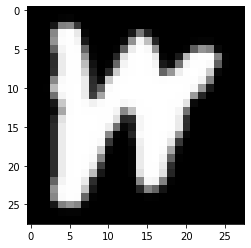

In [127]:
# print classes
print(train_set.classes)
classes = train_set.classes
# print label
index = 0
plt.imshow(train_set.data[index].T, cmap='Greys_r')
print("Label: %s" % train_set.classes[train_set.targets[index]])

### Collected Data

In [256]:
letter_to_label = dict()
classes_collected = ['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for i in range(len(classes_collected)):
    letter_to_label[classes_collected[i]] = i
print(letter_to_label)

{'N/A': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [257]:
# making a dataset of our data
import os
import shutil
import glob

from PIL import Image
import torchvision.transforms as transforms

src_dir = 'dataset'
transform = transforms.ToTensor()

files_train = []
files_val = []
files_test = []
for i in range(0,16): files_train.append('P' + str(i))
for i in range(16,21): files_val.append('P' + str(i))
for i in range(21,24): files_test.append('P' + str(i))

imgs_train = []
imgs_val = []
imgs_test = []
labels_train = []
labels_val = []
labels_test = []
for f in glob.glob(os.path.join(src_dir, '*.png')):
    ftitle, fext = os.path.splitext(os.path.basename(f))
    letter = ftitle.split("_")[1].lower()
    file = ftitle.split("_")[0].split("-")[0]
    im = Image.open(f).convert('L')

    if file in files_train:
        imgs_train.append(transform(im).detach().numpy())
        labels_train.append(letter_to_label[letter])
    elif file in files_val:
        imgs_val.append(transform(im).detach().numpy())
        labels_val.append(letter_to_label[letter])
    elif file in files_test:
        imgs_test.append(transform(im).detach().numpy())
        labels_test.append(letter_to_label[letter])
    
data_train = torch.tensor(imgs_train)
data_val = torch.tensor(imgs_val)
data_test = torch.tensor(imgs_test)
labels_train = torch.tensor(np.array(labels_train))
labels_val = torch.tensor(np.array(labels_val))
labels_test = torch.tensor(np.array(labels_test))

print(data_train.shape, data_val.shape, data_test.shape)
print(labels_train.shape, labels_val.shape, labels_test.shape)

torch.Size([4160, 1, 28, 28]) torch.Size([1300, 1, 28, 28]) torch.Size([780, 1, 28, 28])
torch.Size([4160]) torch.Size([1300]) torch.Size([780])


['N/A', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Label: m


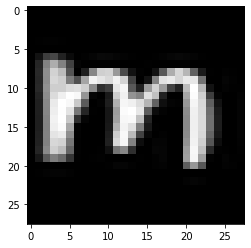

In [258]:
# print classes
print(classes_collected)
# print label
index = 125
plt.imshow(data_train[index].reshape((28, 28)), cmap='Greys_r')
print("Label: %s" % classes_collected[labels_train[index].item()])

In [259]:
batch_size = 1

train_set_collected = torch.utils.data.TensorDataset(data_train, labels_train)
val_set_collected = torch.utils.data.TensorDataset(data_val, labels_val)
test_set_collected = torch.utils.data.TensorDataset(data_test, labels_test)

train_loader_collected = torch.utils.data.DataLoader(train_set_collected, batch_size=batch_size)
val_loader_collected = torch.utils.data.DataLoader(val_set_collected, batch_size=batch_size)
test_loader_collected = torch.utils.data.DataLoader(test_set_collected, batch_size=batch_size)

In [267]:
combined_batch_size=64

combined_train = []
combined_train_labels = []
combined_val = []
combined_val_labels = []
combined_test = []
combined_test_labels = []

for inputs, labels in train_loader:
    combined_train.append( inputs[0].detach().numpy() )
    combined_train_labels.append( labels[0].item() )
for inputs, labels in train_loader_collected:
    combined_train.append( inputs[0].detach().numpy() )
    combined_train_labels.append( labels[0].item() )
for inputs, labels in val_loader:
    combined_val.append( inputs[0].detach().numpy() )
    combined_val_labels.append( labels[0].item() )
for inputs, labels in val_loader_collected:
    combined_val.append( inputs[0].detach().numpy() )
    combined_val_labels.append( labels[0].item() )
for inputs, labels in test_loader:
    combined_test.append( inputs[0].detach().numpy() )
    combined_test_labels.append( labels[0].item() )
for inputs, labels in test_loader_collected:
    combined_test.append( inputs[0].detach().numpy() )
    combined_test_labels.append( labels[0].item() )

combined_train = np.array(combined_train)
combined_train_labels = np.array(combined_train_labels)
combined_val = np.array(combined_val)
combined_val_labels = np.array(combined_val_labels)
combined_test = np.array(combined_test)
combined_test_labels = np.array(combined_test_labels)

print(combined_train.shape)
print(combined_train_labels.shape)
print(combined_val.shape)
print(combined_val_labels.shape)
print(combined_test.shape)
print(combined_test_labels.shape)

# .type(torch.LongTensor)
combined_train = torch.Tensor(combined_train)
combined_train_labels = torch.Tensor(combined_train_labels)

combined_val = torch.Tensor(combined_val)
combined_val_labels = torch.Tensor(combined_val_labels)

combined_test = torch.Tensor(combined_test)
combined_test_labels = torch.Tensor(combined_test_labels)


cobined_train_set = torch.utils.data.TensorDataset(combined_train, combined_train_labels)
combined_train_loader = torch.utils.data.DataLoader(cobined_train_set, batch_size=combined_batch_size, shuffle=True)

cobined_val_set = torch.utils.data.TensorDataset(combined_val, combined_val_labels)
combined_val_loader = torch.utils.data.DataLoader(cobined_val_set, batch_size=combined_batch_size, shuffle=True)

cobined_test_set = torch.utils.data.TensorDataset(combined_test, combined_test_labels)
combined_test_loader = torch.utils.data.DataLoader(cobined_test_set, batch_size=combined_batch_size, shuffle=True)

print(len(combined_train_loader))
print(len(combined_val_loader))
print(len(combined_test_loader))

(50960, 1, 28, 28)
(50960,)
(14500, 1, 28, 28)
(14500,)
(21580, 1, 28, 28)
(21580,)
797
227
797


## Testing CNNs

In [261]:
from tqdm.notebook import tqdm
import torch.nn.functional as F

def train_network(model, train_loader, val_loader, criterion, optimizer, nepoch=100):
    try:
        for epoch in tqdm(range(nepoch)):
            print('EPOCH %d'%epoch)
            total_loss = 0
            count = 0
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model.forward(inputs)

                # print(outputs.dtype, labels.dtype)
                # labels = labels.type(torch.long)
                # print(outputs.dtype, labels.dtype)
                # print(outputs.shape, labels.shape)
                labels = labels.type(torch.long)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
                count += 1
            print('{:>12s} {:>7.5f}'.format('Train loss:', total_loss/count))
            with torch.no_grad():
                total_loss = 0
                count = 0
                for inputs, labels in val_loader:
                    outputs = model.forward(inputs)
                    labels = labels.type(torch.long)
                    loss = criterion(outputs, labels)
                    total_loss += loss.item()
                    count += 1
                print('{:>12s} {:>7.5f}'.format('Val loss:', total_loss/count))
            print()
    except KeyboardInterrupt:
        print('Exiting from training early')
    return

def test_network(model, test_loader):
    correct = 0
    total = 0
    true, pred = [], []
    with torch.no_grad():
        for inputs, labels  in test_loader:
            outputs = model.forward(inputs)
            predicted = torch.argmax(outputs, dim=1) # get predicted class label for each test example.
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            true.append(labels)
            pred.append(predicted)
    acc = (100 * correct / total)
    true = np.concatenate(true)
    pred = np.concatenate(pred)
    return acc, true, pred

def display_contingency_matrix(num_classes, pred, true):
    contingency = np.zeros((num_classes, num_classes))
    for i in range(len(pred)):
        contingency[int(pred[i])][int(true[i])] += 1

    plt.matshow(contingency)
    plt.xlabel("true")
    plt.ylabel("predictions")
    plt.colorbar()

### Single Convolution Layer with MaxPool

In [262]:
class modelCM(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.classes = classes
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5,5), stride=1),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1152, len(self.classes))
        )
            

    def forward(self, x):
        output = self.layers(x)
        # output = output.type(torch.LongTensor)
        return output

In [263]:
model_test = modelCM(classes_collected)
for inputs, labels in combined_train_loader:
    print(inputs.shape)
    print(labels.shape)
    print(inputs.dtype, labels.dtype)
    outputs = model_test.forward(inputs)
    # outputs = outputs.type(torch.LongTensor)
    print(outputs.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.float32 torch.float32
torch.Size([64, 27])


In [270]:
model1 = modelCM(classes_collected)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=1e-3)
train_network(model1, combined_train_loader, combined_val_loader, criterion, optimizer, nepoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH 0
 Train loss: 1.29260
   Val loss: 0.98639

EPOCH 1
 Train loss: 0.77271
   Val loss: 0.81259

EPOCH 2
 Train loss: 0.60469
   Val loss: 0.74268

EPOCH 3
 Train loss: 0.51667
   Val loss: 0.70069

EPOCH 4
 Train loss: 0.45776
   Val loss: 0.67472

EPOCH 5
 Train loss: 0.41860
   Val loss: 0.67392

EPOCH 6
 Train loss: 0.38920
   Val loss: 0.66857

EPOCH 7
 Train loss: 0.36568
   Val loss: 0.68870

EPOCH 8
 Train loss: 0.34610
   Val loss: 0.67012

EPOCH 9
 Train loss: 0.33239
   Val loss: 0.66590



Test accuracy: 85.236


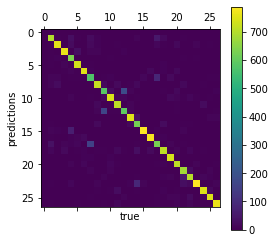

In [272]:
acc, true, pred = test_network(model1, combined_test_loader)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(model1.classes), pred, true)

#### Great example of overfitting:

In [74]:
model1c = modelCM(classes_collected)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1c.parameters(), lr=.001)
train_network(model1c, train_loader_collected, val_loader_collected, criterion, optimizer, nepoch=100)

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH 0
 Train loss: 3.27793
   Val loss: 3.31252

EPOCH 1
 Train loss: 3.14403
   Val loss: 3.31833

EPOCH 2
 Train loss: 3.02879
   Val loss: 3.32129

EPOCH 3
 Train loss: 2.91485
   Val loss: 3.31418

EPOCH 4
 Train loss: 2.79778
   Val loss: 3.29239

EPOCH 5
 Train loss: 2.67427
   Val loss: 3.25436

EPOCH 6
 Train loss: 2.54261
   Val loss: 3.20103

EPOCH 7
 Train loss: 2.40273
   Val loss: 3.13590

EPOCH 8
 Train loss: 2.25669
   Val loss: 3.06405

EPOCH 9
 Train loss: 2.10792
   Val loss: 2.98829

EPOCH 10
 Train loss: 1.95985
   Val loss: 2.91042

EPOCH 11
 Train loss: 1.81565
   Val loss: 2.83149

EPOCH 12
 Train loss: 1.67802
   Val loss: 2.75352

EPOCH 13
 Train loss: 1.54908
   Val loss: 2.68004

EPOCH 14
 Train loss: 1.43006
   Val loss: 2.61367

EPOCH 15
 Train loss: 1.32129
   Val loss: 2.55644

EPOCH 16
 Train loss: 1.22228
   Val loss: 2.51001

EPOCH 17
 Train loss: 1.13241
   Val loss: 2.47501

EPOCH 18
 Train loss: 1.05085
   Val loss: 2.45045

EPOCH 19
 Train loss: 

Test accuracy: 2.778


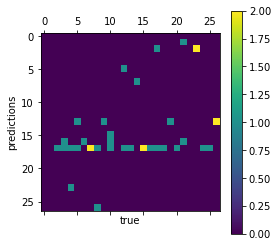

In [79]:
acc, true, pred = test_network(model1, test_loader_collected)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(model1.classes), pred, true)

#### Test model on collected data

In [61]:
acc, true, pred = test_network(model1, data_loader_collected)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(classes_collected), pred, true)

RuntimeError: expected scalar type Byte but found Float

### Smaller Kernel Size

In [17]:
class modelCMS(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.classes = classes
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=1),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1352, len(self.classes))
        )
            

    def forward(self, x):
        return self.layers(x)

In [18]:
model1s = modelCMS(classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1s.parameters(), lr=.001)
train_network(model1s, train_loader, val_loader, criterion, optimizer, nepoch=10)

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH 0
 Train loss: 1.23041
   Val loss: 0.97628

EPOCH 1
 Train loss: 0.87156
   Val loss: 0.82428

EPOCH 2
 Train loss: 0.71721
   Val loss: 0.68793

EPOCH 3
 Train loss: 0.61153
   Val loss: 0.61068

EPOCH 4
 Train loss: 0.54508
   Val loss: 0.57422

EPOCH 5
 Train loss: 0.50417
   Val loss: 0.53292

EPOCH 6
 Train loss: 0.47292
   Val loss: 0.50506

EPOCH 7
 Train loss: 0.44726
   Val loss: 0.50167

EPOCH 8
 Train loss: 0.42715
   Val loss: 0.48336

EPOCH 9
 Train loss: 0.40840
   Val loss: 0.46216



Test accuracy: 85.981


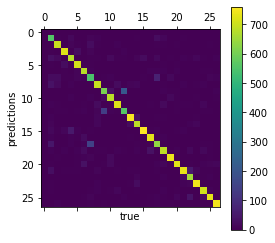

In [19]:
acc, true, pred = test_network(model1s, test_loader)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(model1s.classes), pred, true)

### Double Convolution Layer with MaxPool

In [96]:
class modelCMCM(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.classes = classes
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5,5), stride=1),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=8, out_channels=64, kernel_size=(5,5), stride=1),
            nn.MaxPool2d(kernel_size=(2,2), stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1024, len(self.classes))
        )
            

    def forward(self, x):
        return self.layers(x)

In [102]:
model2 = modelCMCM(classes_collected)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=.0001)
train_network(model2, train_loader_collected, val_loader_collected, criterion, optimizer, nepoch=100)

  0%|          | 0/100 [00:00<?, ?it/s]

EPOCH 0
 Train loss: 3.23556
   Val loss: 3.22127

EPOCH 1
 Train loss: 3.13745
   Val loss: 3.11314

EPOCH 2
 Train loss: 2.89606
   Val loss: 2.86248

EPOCH 3
 Train loss: 2.44638
   Val loss: 2.53783

EPOCH 4
 Train loss: 1.95489
   Val loss: 2.29939

EPOCH 5
 Train loss: 1.59228
   Val loss: 2.14010

EPOCH 6
 Train loss: 1.34678
   Val loss: 2.03265

EPOCH 7
 Train loss: 1.17209
   Val loss: 1.96447

EPOCH 8
 Train loss: 1.03979
   Val loss: 1.92507

EPOCH 9
 Train loss: 0.93456
   Val loss: 1.90356

EPOCH 10
 Train loss: 0.84709
   Val loss: 1.89181

EPOCH 11
 Train loss: 0.77176
   Val loss: 1.88649

EPOCH 12
 Train loss: 0.70542
   Val loss: 1.88480

EPOCH 13
 Train loss: 0.64604
   Val loss: 1.88578

EPOCH 14
 Train loss: 0.59226
   Val loss: 1.88895

EPOCH 15
 Train loss: 0.54318
   Val loss: 1.89391

EPOCH 16
 Train loss: 0.49794
   Val loss: 1.90015

EPOCH 17
 Train loss: 0.45613
   Val loss: 1.90849

EPOCH 18
 Train loss: 0.41732
   Val loss: 1.91881

EPOCH 19
 Train loss: 

Test accuracy: 57.692


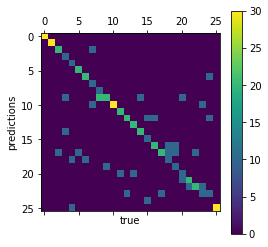

In [103]:
acc, true, pred = test_network(model2, test_loader_collected)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(model2.classes), pred, true)

### Single Convolution Network with Average Pool

In [104]:
class modelCA(nn.Module):
    def __init__(self, classes):
        super().__init__()
        self.classes = classes
        self.layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(5,5), stride=1),
            nn.AvgPool2d(kernel_size=(2,2), stride=2),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(1152, len(self.classes))
        )
            

    def forward(self, x):
        return self.layers(x)

In [105]:
model3 = modelCA(classes)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model3.parameters(), lr=.001)
train_network(model3, train_loader, val_loader, criterion, optimizer, nepoch=10)

NameError: name 'classes' is not defined

Test accuracy: 87.284


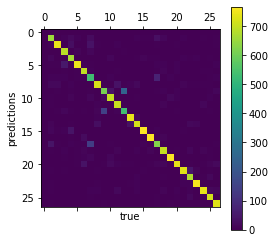

In [25]:
acc, true, pred = test_network(model3, test_loader)
print('Test accuracy: %0.3f' % acc)

display_contingency_matrix(len(model3.classes), pred, true)

## Visualizing Optimized Inputs

In [26]:
class OptimizeInput(nn.Module):
    def __init__(self, learned_model, input_shape=(1, 1, 28, 28)):
        super().__init__()
        self.learned_model = learned_model
        self.optimized_input = torch.zeros(input_shape, requires_grad=True)
        
    def forward(self):
        return self.learned_model(self.optimized_input)
    
    def parameters(self):
        return [self.optimized_input]

In [27]:
# Given model, get optimized input for each character
def get_optimized_inputs(model, nepochs = 10000):
    targets = torch.arange(len(model.classes)).long()
    optimized_inputs = {}

    for t in targets:
        # train input
        input_model = OptimizeInput(model)
        optimizer = torch.optim.Adam(input_model.parameters(), lr=.01)
        criterion = nn.CrossEntropyLoss()
        for epoch in range(nepochs):
            optimizer.zero_grad()
            outputs = input_model()
            loss = criterion(outputs, t.reshape(1))
            loss.backward()
            optimizer.step()
        print("finished %s with %0.5f loss" % (model.classes[t], loss.item()), end = "\t")
        optimized_inputs[model.classes[t]] = input_model.optimized_input.detach().numpy().reshape((28, 28))
        
        # test input
        tensor = torch.Tensor(optimized_inputs[model.classes[t]].reshape(1, 1, 28, 28))
        with torch.no_grad():
            output = model(tensor)
        prob = output.squeeze().detach().numpy()
        pred = model.classes[torch.argmax(output, dim=1)]
        print(f"Expected: {model.classes[t]}. Predicted: {pred}.")
    return optimized_inputs

In [28]:
optimized_inputs = get_optimized_inputs(model2, nepochs=1000)

finished N/A with 0.64832 loss	Expected: N/A. Predicted: N/A.
finished a with 0.00029 loss	Expected: a. Predicted: a.
finished b with 0.00020 loss	Expected: b. Predicted: b.
finished c with 0.00013 loss	Expected: c. Predicted: c.
finished d with 0.00031 loss	Expected: d. Predicted: d.
finished e with 0.00019 loss	Expected: e. Predicted: e.
finished f with 0.00012 loss	Expected: f. Predicted: f.
finished g with 0.00011 loss	Expected: g. Predicted: g.
finished h with 0.00022 loss	Expected: h. Predicted: h.
finished i with 0.00004 loss	Expected: i. Predicted: i.
finished j with 0.00006 loss	Expected: j. Predicted: j.
finished k with 0.00013 loss	Expected: k. Predicted: k.
finished l with 0.00003 loss	Expected: l. Predicted: l.
finished m with 0.00016 loss	Expected: m. Predicted: m.
finished n with 0.00016 loss	Expected: n. Predicted: n.
finished o with 0.00062 loss	Expected: o. Predicted: o.
finished p with 0.00009 loss	Expected: p. Predicted: p.
finished q with 0.00011 loss	Expected: q. 

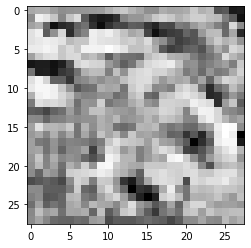

In [29]:
letter = 'b'
letter_visualized = optimized_inputs[letter].T
plt.imshow(letter_visualized, cmap='Greys_r')